# Hotel Booking Analysis
## Proyek Akhir
### Pendahuluan
Proyek ini bertujuan untuk:
1. **Membersihkan dan Menganalisis Dataset Pemesanan Hotel**: Dataset berisi 119.390 entri dengan informasi tentang pemesanan hotel, termasuk tipe hotel, status pembatalan, lama tinggal, pendapatan rata-rata, dan banyak lagi.
2. **Memahami Tren dan Pola**: Fokus utama adalah menganalisis tingkat pembatalan, panjang waktu pemesanan, dan pendapatan rata-rata (ADR).
3. **Memberikan Wawasan untuk Pengelola Hotel**: Hasil analisis ini dapat digunakan untuk menyusun strategi peningkatan layanan dan kebijakan hotel.

### Data yang Digunakan
Dataset berasal dari Kaggle, berisi data pemesanan hotel dengan kolom-kolom seperti:
- `hotel`: Tipe hotel (*City Hotel* atau *Resort Hotel*).
- `is_canceled`: Status pembatalan.
- `lead_time`: Jarak waktu antara pemesanan dan kedatangan.
- `adr`: Pendapatan rata-rata harian (Average Daily Rate).

##Setup dan Import Dataset

In [13]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/hotels.csv"  # Path file di Colab
hotels_data = pd.read_csv(file_path)

# Menampilkan informasi awal dataset
print("Informasi Dataset:")
print(hotels_data.info())
print("\n5 Data Teratas:")
print(hotels_data.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 1

# Pembersihan Data
Pembersihan dilakukan untuk memastikan kualitas data:
1. **Nilai Kosong**:
   - Kolom `children`: Kosong diisi dengan 0.
   - Kolom `country`: Baris dengan nilai kosong dihapus.
   - Kolom `agent` dan `company`: Nilai kosong diubah menjadi 0.
2. **Duplikasi**:
   - Baris duplikat dihapus.
3. **Data Tidak Valid**:
   - Baris dengan jumlah tamu 0 dihapus.
   - Baris dengan nilai negatif di kolom `adr` dihapus.

##Tangani Nilai Kosong

In [14]:
# Menangani nilai kosong
print("Jumlah nilai kosong per kolom sebelum pembersihan:")
print(hotels_data.isnull().sum())

# Isi nilai kosong di kolom 'children' dengan 0
hotels_data['children'] = hotels_data['children'].fillna(0)

# Hapus baris dengan nilai kosong di kolom 'country' (penting)
hotels_data = hotels_data.dropna(subset=['country'])

# Kolom 'agent' dan 'company' berisi banyak nilai kosong, ubah menjadi 0
hotels_data['agent'] = hotels_data['agent'].fillna(0)
hotels_data['company'] = hotels_data['company'].fillna(0)

print("\nJumlah nilai kosong per kolom setelah pembersihan:")
print(hotels_data.isnull().sum())

Jumlah nilai kosong per kolom sebelum pembersihan:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent 

<ipython-input-14-83a1829845fc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_data['agent'] = hotels_data['agent'].fillna(0)
<ipython-input-14-83a1829845fc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_data['company'] = hotels_data['company'].fillna(0)


##Periksa Duplikasi Data

In [15]:
# Periksa duplikasi
duplicates = hotels_data.duplicated().sum()
print(f"\nJumlah duplikasi dalam dataset: {duplicates}")

# Hapus data duplikat
hotels_data = hotels_data.drop_duplicates()


Jumlah duplikasi dalam dataset: 31958


##Koreksi Data Tidak Valid
Beberapa kolom mungkin berisi data tidak logis. Contoh:

adults, children, dan babies tidak boleh semua 0.
Data adr (Average Daily Rate) negatif.
python
Copy code


In [16]:
# Hapus baris dengan jumlah tamu 0
hotels_data = hotels_data[(hotels_data['adults'] + hotels_data['children'] + hotels_data['babies']) > 0]

# Hapus baris dengan nilai 'adr' negatif
hotels_data = hotels_data[hotels_data['adr'] >= 0]

In [17]:
print("\nJumlah nilai kosong per kolom setelah pembersihan:")
print(hotels_data.isnull().sum())


Jumlah nilai kosong per kolom setelah pembersihan:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_typ

#Eksplorasi Data
## Analisis Data
Hasil analisis awal:
1. Tipe hotel yang paling banyak dipesan: *City Hotel* lebih sering dipesan dibandingkan *Resort Hotel*.
2. Tingkat pembatalan: Tinggi, dengan lebih dari 30% reservasi dibatalkan.
3. Distribusi ADR: Menunjukkan rentang harga rata-rata harian untuk tamu.

Visualisasi menunjukkan pola-pola utama dari data.


##Statistik Deskriptif

In [18]:
# Statistik deskriptif
print("Statistik deskriptif dataset:")
print(hotels_data.describe())

Statistik deskriptif dataset:
        is_canceled     lead_time  arrival_date_year  \
count  86782.000000  86782.000000       86782.000000   
mean       0.276325     80.264513        2016.211818   
std        0.447182     86.105250           0.685996   
min        0.000000      0.000000        2015.000000   
25%        0.000000     12.000000        2016.000000   
50%        0.000000     50.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              86782.000000               86782.000000   
mean                  26.839056                  15.817900   
std                   13.649172                   8.834754   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000

##Distribusi Kolom Penting

In [19]:
# Distribusi tipe hotel
print("Distribusi tipe hotel:")
print(hotels_data['hotel'].value_counts())

# Distribusi pembatalan
print("\nDistribusi pembatalan:")
print(hotels_data['is_canceled'].value_counts())

Distribusi tipe hotel:
hotel
City Hotel      53271
Resort Hotel    33511
Name: count, dtype: int64

Distribusi pembatalan:
is_canceled
0    62802
1    23980
Name: count, dtype: int64


#Visualisasi Data

##Impor Library Visualisasi

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

##Grafik Distribusi Tipe Hotel

<ipython-input-21-7b4e12116260>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels_data, x='hotel', palette='Set2')


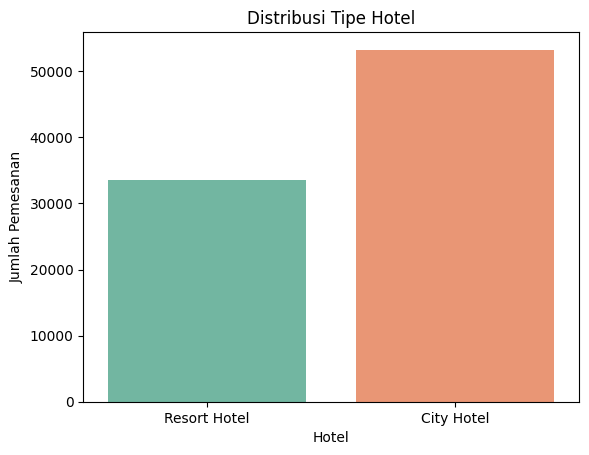

In [21]:
sns.countplot(data=hotels_data, x='hotel', palette='Set2')
plt.title("Distribusi Tipe Hotel")
plt.xlabel("Hotel")
plt.ylabel("Jumlah Pemesanan")
plt.show()

Wawasan: City Hotel lebih populer karena lokasinya di pusat kota yang lebih mudah diakses oleh banyak wisatawan.

##Grafik Pembatalan

<ipython-input-22-238cbd420062>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels_data, x='is_canceled', palette='Set1')


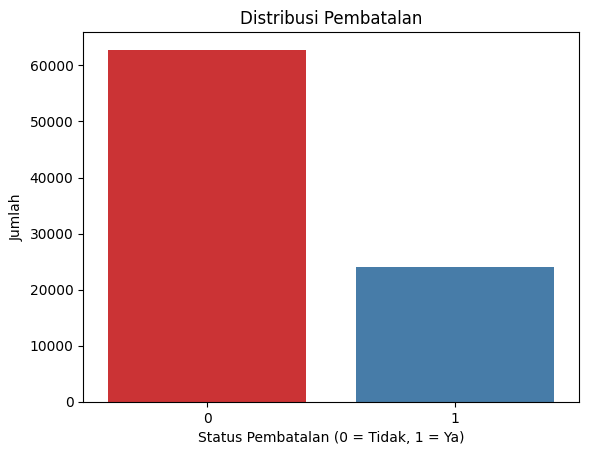

In [22]:
sns.countplot(data=hotels_data, x='is_canceled', palette='Set1')
plt.title("Distribusi Pembatalan")
plt.xlabel("Status Pembatalan (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

Wawasan: Lebih dari 25% pemesanan dibatalkan, yang menunjukkan adanya potensi untuk meningkatkan kebijakan pembatalan.

##Tambahkan Variabel Baru
Tambahkan variabel seperti total lama tinggal.


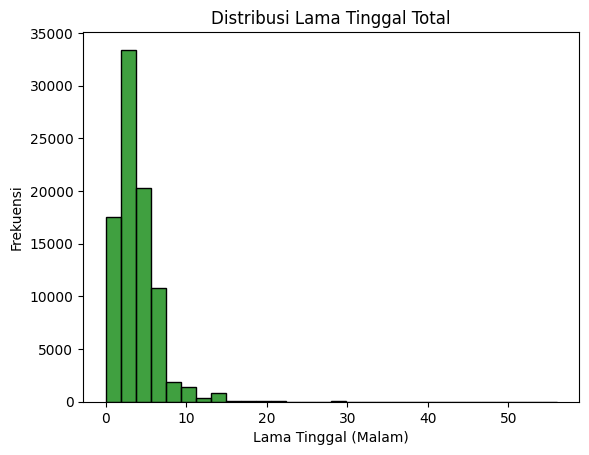

In [23]:
# Tambahkan kolom baru: Lama tinggal total
hotels_data['total_stays'] = hotels_data['stays_in_weekend_nights'] + hotels_data['stays_in_week_nights']

# Tampilkan distribusi lama tinggal
sns.histplot(hotels_data['total_stays'], kde=False, color='green', bins=30)
plt.title("Distribusi Lama Tinggal Total")
plt.xlabel("Lama Tinggal (Malam)")
plt.ylabel("Frekuensi")
plt.show()

##Analisis Tren Bulanan

<ipython-input-24-b6d6b1cff3ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels_data, x='arrival_date_month', palette='coolwarm',


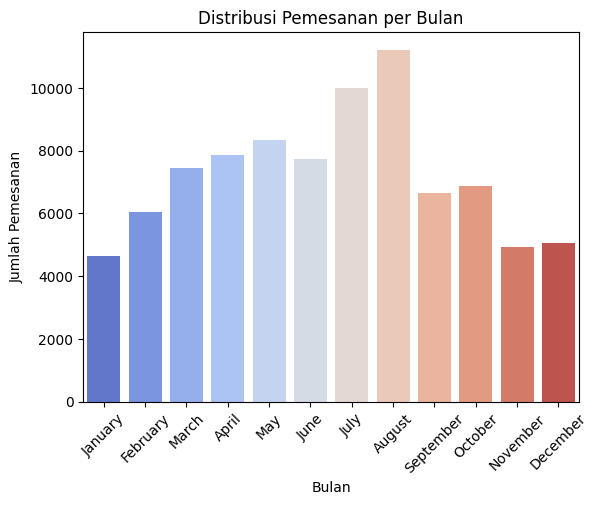

In [24]:
# Distribusi pemesanan berdasarkan bulan
sns.countplot(data=hotels_data, x='arrival_date_month', palette='coolwarm',
              order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                     'September', 'October', 'November', 'December'])
plt.title("Distribusi Pemesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pemesanan")
plt.xticks(rotation=45)
plt.show()

##Analisis Tren Berdasarkan Waktu
Apakah pembatalan atau pemesanan dipengaruhi oleh bulan atau musim tertentu?

arrival_date_month
August       11221
July         10010
May           8332
April         7864
June          7744
March         7434
October       6870
September     6651
February      6029
December      5064
November      4933
January       4630
dtype: int64


<ipython-input-28-4e9835f366f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels_data, x='arrival_date_month', palette='Set2', order=monthly_trends.index)


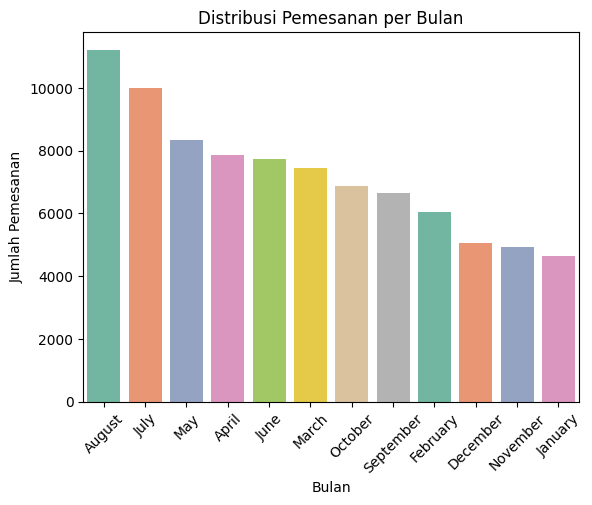

In [28]:
# Tren pemesanan per bulan
monthly_trends = hotels_data.groupby('arrival_date_month').size().sort_values(ascending=False)
print(monthly_trends)

# Visualisasi Tren Pemesanan per Bulan
sns.countplot(data=hotels_data, x='arrival_date_month', palette='Set2', order=monthly_trends.index)
plt.title("Distribusi Pemesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pemesanan")
plt.xticks(rotation=45)
plt.show()


#Analisis Hubungan Antar Variabel

##Hubungan Pembatalan dan Lead Time

<ipython-input-25-9d2c69e8dd97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotels_data, x='is_canceled', y='lead_time', palette='coolwarm')


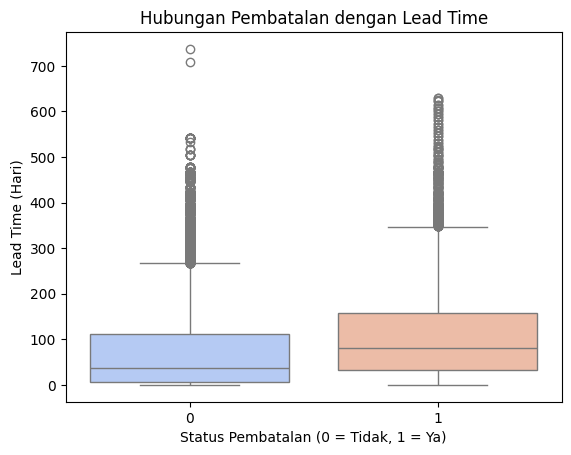

In [25]:
sns.boxplot(data=hotels_data, x='is_canceled', y='lead_time', palette='coolwarm')
plt.title("Hubungan Pembatalan dengan Lead Time")
plt.xlabel("Status Pembatalan (0 = Tidak, 1 = Ya)")
plt.ylabel("Lead Time (Hari)")
plt.show()

##Analisis ADR (Pendapatan Rata-Rata) Berdasarkan Tipe Hotel

<ipython-input-26-20ef4d944f80>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotels_data, x='hotel', y='adr', palette='Set2')


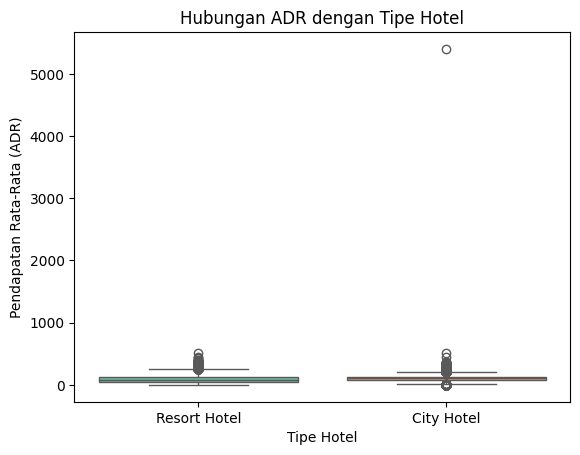

In [26]:
sns.boxplot(data=hotels_data, x='hotel', y='adr', palette='Set2')
plt.title("Hubungan ADR dengan Tipe Hotel")
plt.xlabel("Tipe Hotel")
plt.ylabel("Pendapatan Rata-Rata (ADR)")
plt.show()

#Dokumentasi dan Output

##Simpan Dataset Bersih

In [27]:
# Simpan dataset bersih ke file baru
cleaned_file_path = "/content/hotels_cleaned.csv"
hotels_data.to_csv(cleaned_file_path, index=False)
print(f"Dataset bersih disimpan di: {cleaned_file_path}")

Dataset bersih disimpan di: /content/hotels_cleaned.csv


## Rangkuman
### Temuan Utama:
1. **Distribusi Tipe Hotel**: *City Hotel* lebih populer daripada *Resort Hotel*.
2. **Pembatalan**: Tingkat pembatalan mencapai 27,6%.
3. **Lama Tinggal**: Lama tinggal paling sering adalah 1-3 malam.
4. **Lead Time**: Reservasi dengan *lead time* yang lebih panjang cenderung dibatalkan.
5. **ADR**: *Resort Hotel* memiliki ADR lebih tinggi dibandingkan *City Hotel*.

### Implikasi:
1. Hotel dapat meningkatkan pendapatan dengan strategi untuk mengurangi pembatalan.
2. *City Hotel* dapat menawarkan promosi untuk tamu jangka pendek.
